# Visualization of template experiment
This notebook plots the gene expression data of the template experiment in order to confirm the strength of the differential signal, since we will be performing a DE analysis downstream.

In [ ]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np
import random
import umap
from plotnine import (ggplot,
                      labs,  
                      geom_point,
                      aes, 
                      ggsave, 
                      theme_bw,
                      theme,
                      facet_wrap,
                      scale_color_manual,
                      guides, 
                      guide_legend,
                      element_blank,
                      element_text,
                      element_rect,
                      element_line,
                      coords)

from ponyo import utils

np.random.seed(123)

In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../"))
config_file = os.path.abspath(os.path.join(base_dir,
                                           "config_pseudomonas.tsv"))
params = utils.read_config(config_file)

In [3]:
# Load parameters
local_dir = params["local_dir"]
dataset_name = params['dataset_name']
project_id = params['project_id']
template_data_file = params['template_data_file']

In [4]:
# Load metadata file with grouping assignments for samples
metadata_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "metadata",
    project_id+"_groups.tsv")

In [5]:
# Read template data
data = pd.read_csv(template_data_file, sep="\t", header=0, index_col=0)

data.head()

,dnaA,dnaN,recF,gyrB,lptA,PA0006,PA0007,glyS,glyQ,tag,...,atpI,spoOJ,soj,gidB,gidA,PA5566,PA5567,PA5568,rnpA,rpmH
GSM252496.CEL,9.302,10.341,8.510,8.547,7.190,8.098,7.763,8.712,8.231,5.404,...,8.287,8.422,10.390,10.196,9.007,6.520,7.810,10.835,12.155,11.470
GSM252501.CEL,9.227,10.600,8.497,8.441,7.268,7.665,8.333,8.631,8.363,5.334,...,8.348,8.778,10.514,10.277,9.081,5.861,7.967,11.192,12.462,11.523
GSM252505.CEL,9.517,10.340,8.802,8.454,7.423,7.526,8.066,8.698,8.356,5.988,...,7.802,8.643,10.475,10.347,9.318,6.276,7.931,11.226,12.402,11.553
GSM252506.CEL,8.909,8.114,8.079,7.796,7.953,8.078,8.217,7.639,8.158,5.865,...,8.689,6.182,9.096,7.042,8.484,6.593,7.235,8.915,12.892,12.143
GSM252507.CEL,8.672,8.468,7.908,8.187,7.866,8.101,7.874,7.662,8.058,5.590,...,8.507,6.612,8.934,7.425,8.923,5.940,7.355,8.663,12.862,12.163


In [6]:
# Read metadata
metadata = pd.read_csv(metadata_file, sep="\t", header=0, index_col=0)

metadata.head()

,group
Sample,
GSM252496.CEL,1
GSM252501.CEL,1
GSM252505.CEL,1
GSM252506.CEL,2
GSM252507.CEL,2


In [7]:
# Embed expression data into low dimensional space
model = umap.UMAP(random_state=123).fit(data)
data_encoded = model.transform(data)

data_encoded_df = pd.DataFrame(data=data_encoded,
                               index=data.index,
                               columns=['1','2'])


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/umap/umap_.py:1674: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


In [8]:
# Label samples
group1_ids = list(metadata[metadata['group']==1].index)

#data_encoded_df['group'] = 'clinical multi-drug resistant'
#data_encoded_df.loc[group1_ids,'group'] = 'clinical'
#data_encoded_df.loc['GSM625982.CEL','group'] = 'control'
data_encoded_df['group'] = 'untreated'
data_encoded_df.loc[group1_ids,'group'] = 'treated with tobramycin'

In [9]:
data_encoded_df.head()

,1,2,group
GSM252496.CEL,-0.730678,-17.206274,treated with tobramycin
GSM252501.CEL,-1.430552,-17.501936,treated with tobramycin
GSM252505.CEL,-1.499085,-16.664152,treated with tobramycin
GSM252506.CEL,-0.998827,-14.882368,untreated
GSM252507.CEL,-1.731637,-15.197276,untreated


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


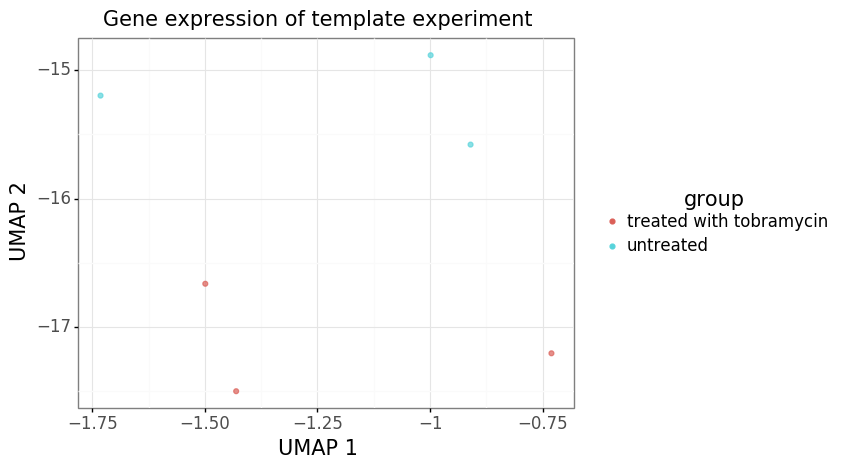

<ggplot: (8791379716545)>


In [10]:
# Plot PAO1
fig = ggplot(data_encoded_df, aes(x='1', y='2'))
fig += geom_point(aes(color='group'), alpha=0.7)
fig += labs(x ='UMAP 1',
            y = 'UMAP 2',
            title = 'Gene expression of template experiment')
fig += theme_bw()
fig += theme(
    legend_title_align = "center",
    plot_background=element_rect(fill='white'),
    legend_key=element_rect(fill='white', colour='white'), 
    legend_title=element_text(family='sans-serif', size=15),
    legend_text=element_text(family='sans-serif', size=12),
    plot_title=element_text(family='sans-serif', size=15),
    axis_text=element_text(family='sans-serif', size=12),
    axis_title=element_text(family='sans-serif', size=15)
    )
fig += guides(colour=guide_legend(override_aes={'alpha': 1}))

print(fig)

**Observation:** We see a good separation between the treated and untreated samples. We expect this template experiment to provide a fairly strong differential signal in our DE analysis.